In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
#loading data
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


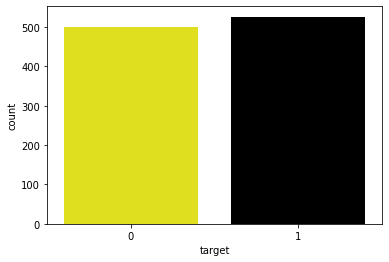

In [ ]:
#first of all let us evaluate the target and find out if our data is imbalanced or not
cols= ["yellow","black"]
sns.countplot(x= data["target"], palette= cols)

In [ ]:

#assigning values to features as X and target as y
X=data.drop(["target"],axis=1)
y=data["target"]

In [ ]:
#Set up a standard scaler for the features
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df = s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,-3.431402e-16,1.000488,-2.804866,-0.709555,0.172682,0.724079,2.488552
sex,1025.0,1.802352e-16,1.000488,-1.511706,-1.511706,0.661504,0.661504,0.661504
cp,1025.0,5.545699e-17,1.000488,-0.915755,-0.915755,0.055931,1.027618,1.999305
trestbps,1025.0,-7.036106e-16,1.000488,-2.148237,-0.663216,-0.092055,0.479107,3.906079
chol,1025.0,-3.466062e-18,1.000488,-2.327054,-0.678724,-0.116353,0.562371,6.166694
fbs,1025.0,-4.159275e-17,1.000488,-0.418878,-0.418878,-0.418878,-0.418878,2.387330
restecg,1025.0,-8.318549e-17,1.000488,-1.004049,-1.004049,0.891255,0.891255,2.786558
thalach,1025.0,-4.332578e-16,1.000488,-3.397080,-0.744271,0.125502,0.734343,2.299935
exang,1025.0,-7.625337e-17,1.000488,-0.712287,-0.712287,-0.712287,1.403928,1.403928
oldpeak,1025.0,-2.426243e-16,1.000488,-0.912329,-0.912329,-0.231177,0.620264,4.366603


In [ ]:
#spliting test and training sets
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.25,random_state=7)

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=30, # how many epochs to wait before stopping
    restore_best_weights=True)

# Initialising the NN
model = Sequential()

# layers
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu', input_dim = 13))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
from tensorflow.keras.optimizers import SGD
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
#Train the ANN
history = model.fit(X_train, y_train, batch_size = 32, epochs = 500,callbacks=[early_stopping], validation_split=0.2)

Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5033 - val_loss: 0.6933 - val_accuracy: 0.4481
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6931 - accuracy: 0.5098 - val_loss: 0.6932 - val_accuracy: 0.4481
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5098 - val_loss: 0.6925 - val_accuracy: 0.4481
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6897 - accuracy: 0.5098 - val_loss: 0.6880 - val_accuracy: 0.4481
Epoch 5/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6792 - accuracy: 0.5261 - val_loss: 0.6717 - val_accuracy: 0.4481
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6500 - accuracy: 0.6401 - val_loss: 0.6342 - val_accuracy: 0.7922
Epoch 7/500
20/20 [==============================] - 0s 5ms/step - loss: 0.6049 - accuracy: 0.7345 - val_loss: 0.5808 - val_accuracy: 0.8506
Epoch 8/500


In [ ]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 85.95%


In [ ]:

# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()

9/9 [==============================] - 0s 3ms/step


In [ ]:

y_test

571    0
146    1
361    1
747    0
396    0
      ..
122    0
531    1
781    0
870    1
893    0
Name: target, Length: 257, dtype: int64

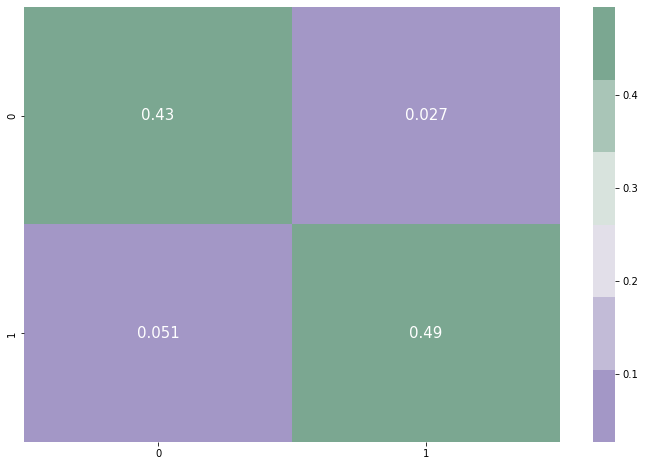

In [ ]:

cmap1 = sns.diverging_palette(275,150,  s=40, l=65, n=6)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})